In [143]:
%load_ext autoreload
%autoreload 2
from demand_forecast import (
    df_hospital_inpatients, 
    df_population_history,
    df_population_projection,
    df_per_capita_demand,
    grid_search_ARIMA,
    forecast_ARIMA,
    forecast_demand,
    ProjectionVariant,
    REGION_CODE, YEAR, VALUE, REGION_CODE_MAPPING
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Plotting trends of Hospital Inpatients, Population History and Per-Capita Demand

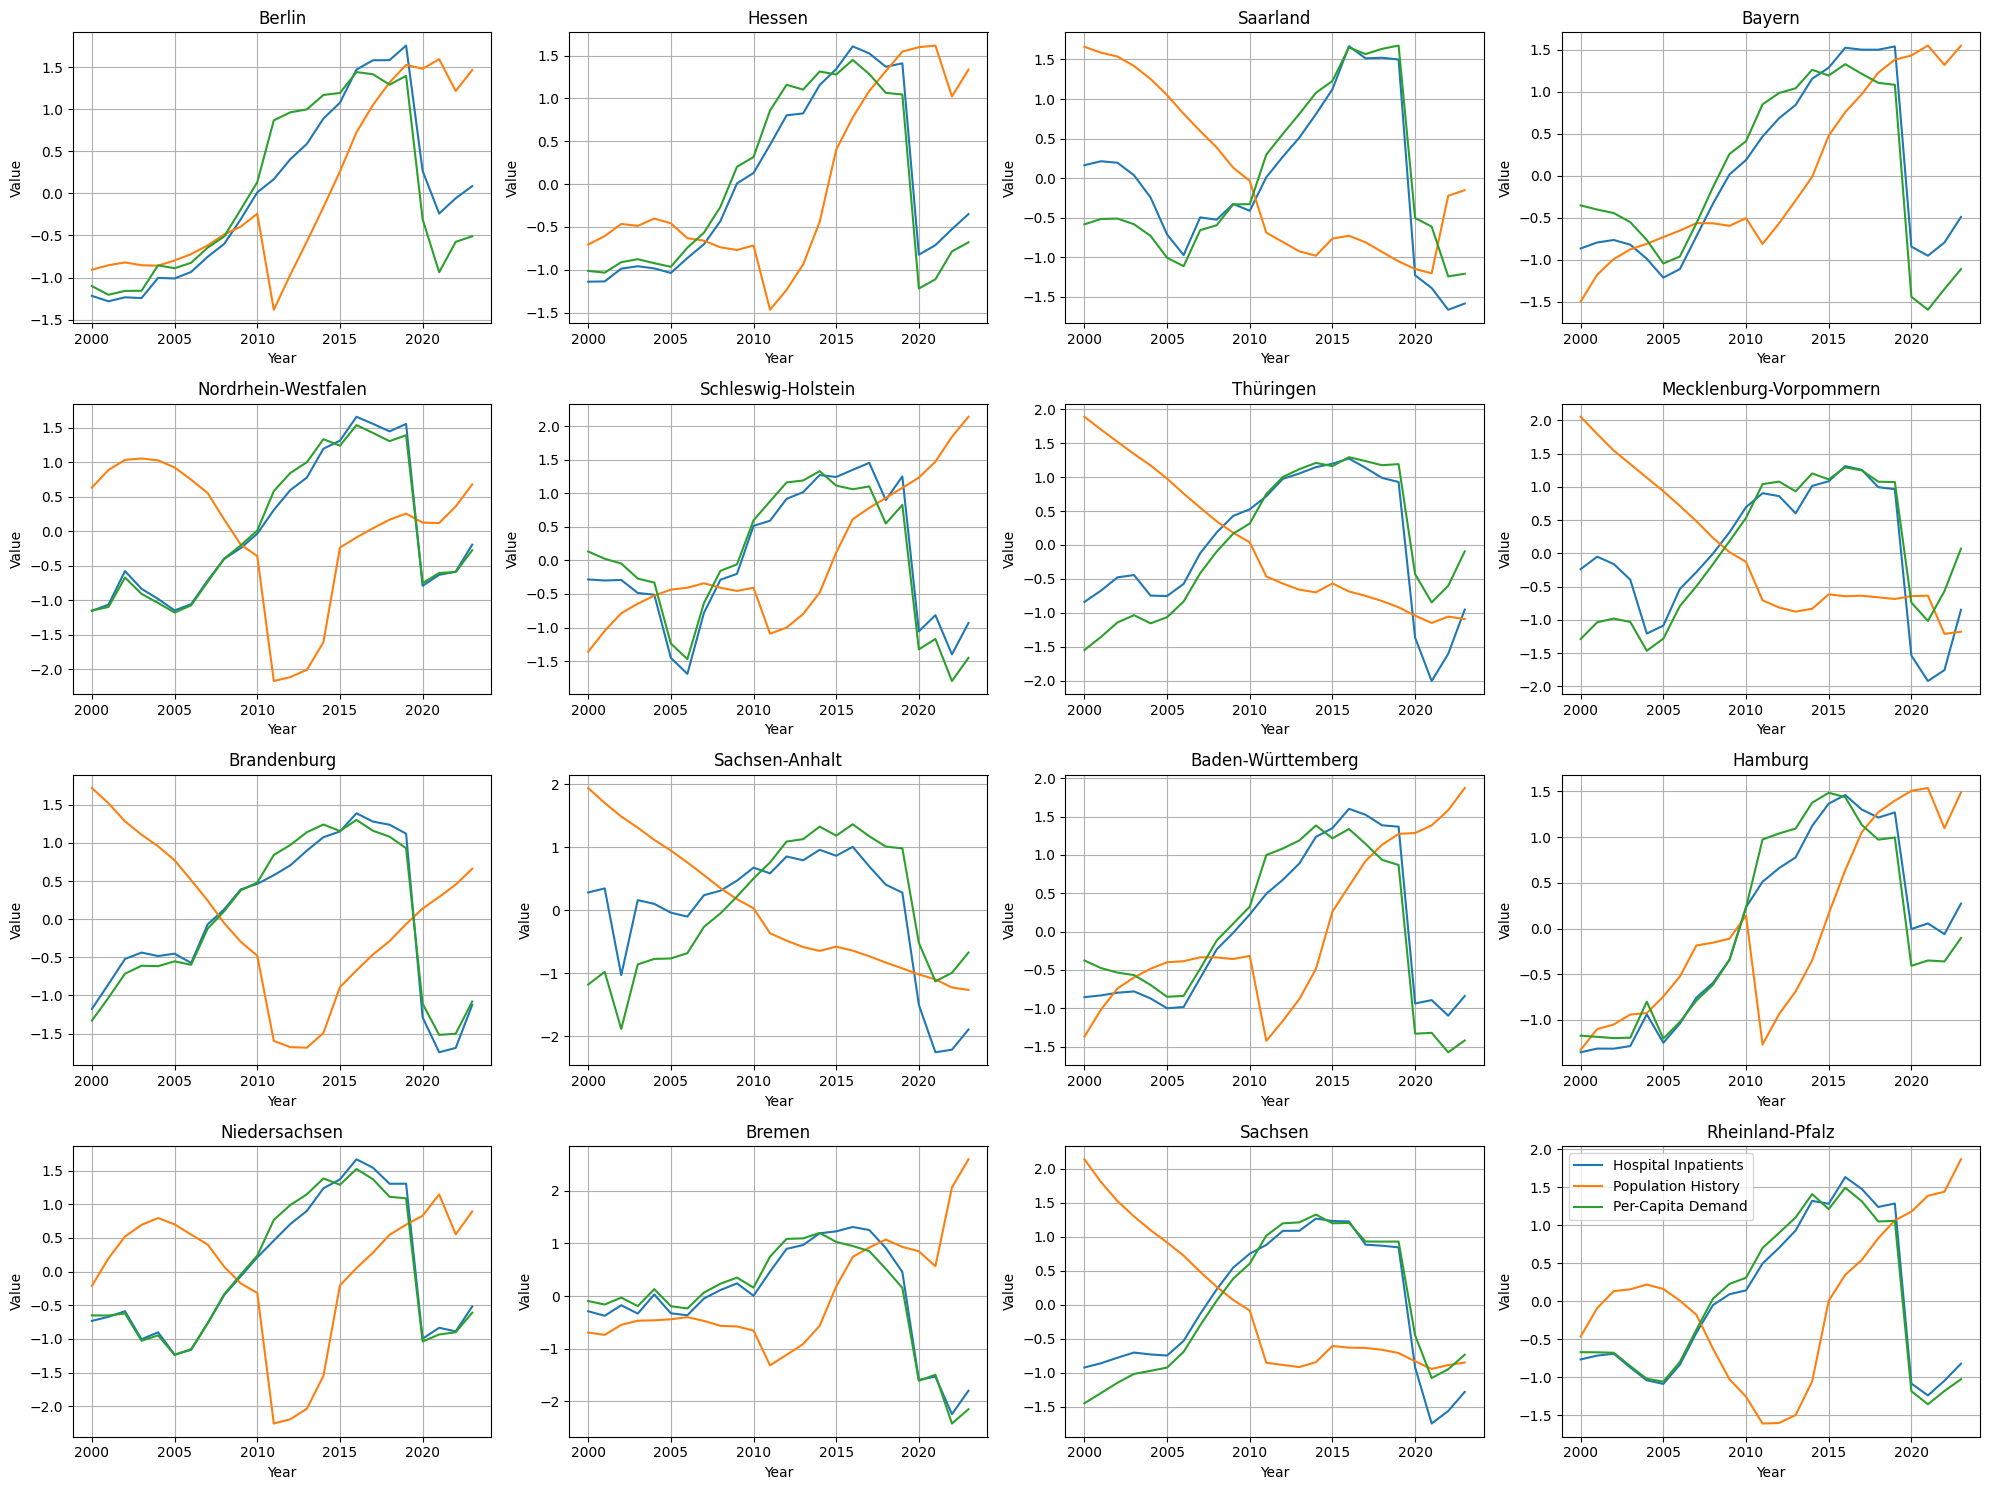

In [144]:
import matplotlib.pyplot as plt

dfph = df_population_history()
dfph = dfph.pivot(
    index=REGION_CODE,
    columns=YEAR,
    values=VALUE
)
dfhi = df_hospital_inpatients()
dfhi = dfhi.pivot(
    index=REGION_CODE,
    columns=YEAR,
    values=VALUE
)
dfpcd = df_per_capita_demand()

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()
for i, code in enumerate(REGION_CODE_MAPPING.keys()):
    ax = axes[i]
    hi = (dfhi.loc[code] - dfhi.loc[code].mean()) / dfhi.loc[code].std()
    ph = (dfph.loc[code] - dfph.loc[code].mean()) / dfph.loc[code].std()
    pcd = (dfpcd.loc[code] - dfpcd.loc[code].mean()) / dfpcd.loc[code].std()
    hi.plot(kind="line", ax=ax, label='Hospital Inpatients')
    ph.plot(kind="line", ax=ax, label='Population History')
    pcd.plot(kind="line", ax=ax, label='Per-Capita Demand')
    ax.set_title(REGION_CODE_MAPPING[code])
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.grid(True)
   
ax.legend()
plt.tight_layout()
plt.show()

### Fitting and Forecasting with ARIMA Model 
Forecasting for Berlin 

In [145]:
region_code = 11
per_capita_demand = dfpcd.loc[region_code]

best_model, best_order = grid_search_ARIMA(
    per_capita_demand, p_values=[0,1,2,3], d_values=[0,1,2,3], q_values=[0,1,2,3])

/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(0,0,0) AIC=-123.92
Current best order (0,0,0)
ARIMA(0,0,1) AIC=-145.63
Current best order (0,0,1)
ARIMA(0,0,2) AIC=-148.70
Current best order (0,0,2)
ARIMA(0,0,3) AIC=-156.20
Current best order (0,0,3)
ARIMA(0,1,0) AIC=-157.31
Current best order (0,1,0)
ARIMA(0,1,1) AIC=-157.21
ARIMA(0,1,2) AIC=-155.48
ARIMA(0,1,3) AIC=-154.00
ARIMA(0,2,0) AIC=-140.88
ARIMA(0,2,1) AIC=-145.38
ARIMA(0,2,2) AIC=-143.45
ARIMA(0,2,3) AIC=-143.02
ARIMA(0,3,0) AIC=-113.23
ARIMA(0,3,1) AIC=-128.32


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(0,3,2) AIC=-130.02
ARIMA(0,3,3) AIC=-127.24
ARIMA(1,0,0) AIC=-160.34
Current best order (1,0,0)
ARIMA(1,0,1) AIC=-160.98
Current best order (1,0,1)
ARIMA(1,0,2) AIC=-159.06


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospati

ARIMA(1,0,3) AIC=-158.30
ARIMA(1,1,0) AIC=-156.87
ARIMA(1,1,1) AIC=-155.87
ARIMA(1,1,2) AIC=-153.39
ARIMA(1,1,3) AIC=-151.82
ARIMA(1,2,0) AIC=-141.11
ARIMA(1,2,1) AIC=-144.02
ARIMA(1,2,2) AIC=-143.22


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(1,2,3) AIC=-141.22
ARIMA(1,3,0) AIC=-117.79
ARIMA(1,3,1) AIC=-127.10
ARIMA(1,3,2) AIC=-124.28


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(1,3,3) AIC=-127.17
ARIMA(2,0,0) AIC=-160.78
ARIMA(2,0,1) AIC=-158.84
ARIMA(2,0,2) AIC=-157.40


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(2,0,3) AIC=-156.14
ARIMA(2,1,0) AIC=-155.04
ARIMA(2,1,1) AIC=-153.13
ARIMA(2,1,2) AIC=-151.99


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(2,1,3) AIC=-149.89
ARIMA(2,2,0) AIC=-142.74
ARIMA(2,2,1) AIC=-142.71
ARIMA(2,2,2) AIC=-141.20


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(2,2,3) AIC=-138.86
ARIMA(2,3,0) AIC=-125.66
ARIMA(2,3,1) AIC=-124.94


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospati

ARIMA(2,3,2) AIC=-125.60
ARIMA(2,3,3) AIC=-123.83
ARIMA(3,0,0) AIC=-158.74
ARIMA(3,0,1) AIC=-157.27
ARIMA(3,0,2) AIC=-154.12


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(3,0,3) AIC=-154.10
ARIMA(3,1,0) AIC=-153.48
ARIMA(3,1,1) AIC=-151.60
ARIMA(3,1,2) AIC=-149.66


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(3,1,3) AIC=-148.03
ARIMA(3,2,0) AIC=-141.51
ARIMA(3,2,1) AIC=-140.39


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(3,2,2) AIC=-139.09
ARIMA(3,2,3) AIC=-136.82
ARIMA(3,3,0) AIC=-123.90


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(3,3,1) AIC=-125.52


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

ARIMA(3,3,2) AIC=-124.30
ARIMA(3,3,3) AIC=-122.58


/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/mws/uni/Data Science/equity-aware-geospati

In [146]:
period = 17
forecast, conf_int = forecast_ARIMA(best_model, period)

/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/mws/uni/Data Science/equity-aware-geospatial-ai-project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/tmp/ipykernel_80513/3467358690.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


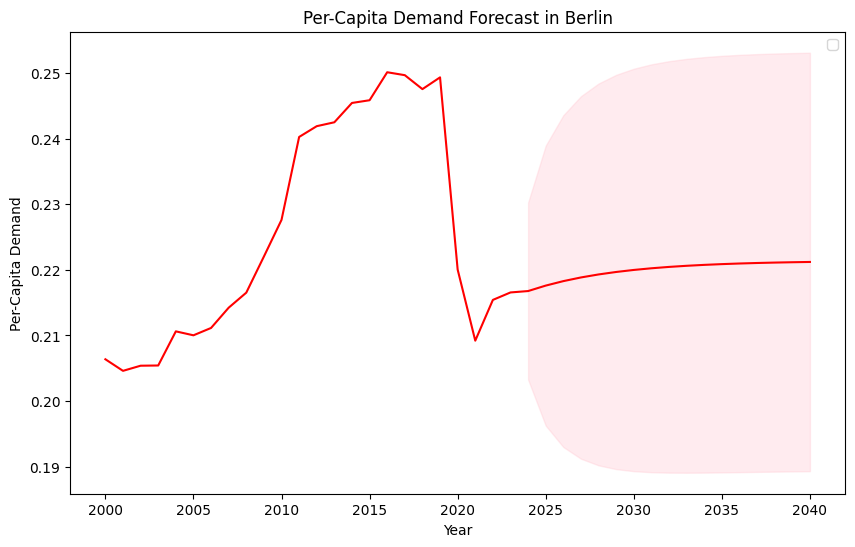

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine
full_series = pd.concat([per_capita_demand, forecast])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(full_series.index, full_series.values, color='red')

# Add confidence intervals (only on forecast part)
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'Per-Capita Demand Forecast in {REGION_CODE_MAPPING[region_code]}')
plt.xlabel('Year')
plt.ylabel('Per-Capita Demand')
plt.legend()
plt.show()


### Forecasting Demand 
For variant BEV-VARIANTE-01

In [148]:
demand, demand_conf_int = forecast_demand(forecast, region_code, ProjectionVariant.VAR01, conf_int)

/tmp/ipykernel_80513/1074339572.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


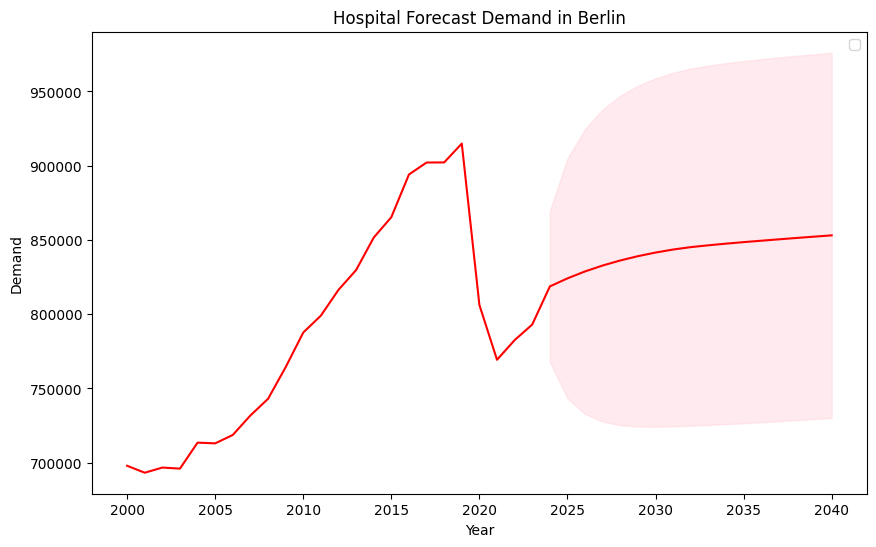

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

history_hospital_inpatients = dfhi.loc[region_code]

# Combine
full_series = pd.concat([history_hospital_inpatients, demand])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(full_series.index, full_series.values, color='red')

# Add confidence intervals (only on forecast part)
plt.fill_between(forecast.index, demand_conf_int.iloc[:, 0], demand_conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'Hospital Forecast Demand in {REGION_CODE_MAPPING[region_code]}')
plt.xlabel('Year')
plt.ylabel('Demand')
plt.legend()
plt.show()